# Hands-on ML Final Project

In [258]:
import cv2
import os
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA

## State of art

## Dataset Analysis

### Load dataset

In [259]:
data_dir = "./data/chest_xray/"
TRAIN_PATH = 'train'
TEST_PATH = 'test'

In [260]:
train_path = os.path.join(data_dir,TRAIN_PATH)
test_path=os.path.join(data_dir,TEST_PATH)

In [261]:
train_images_paths = os.listdir(os.path.join(train_path,'NORMAL')) + os.listdir(os.path.join(train_path,'PNEUMONIA'))
test_images_paths = os.listdir(os.path.join(test_path,'NORMAL'))+ os.listdir(os.path.join(test_path,'PNEUMONIA'))
len(train_images_paths), len(test_images_paths)

(5232, 624)

In [262]:
train_images_paths[0]

'NORMAL2-IM-0927-0001.jpeg'

In [263]:
def parse_pictures_to_label(images):
    labels = []
    for image in images:
        image = image.split('.')[0]
        if image.startswith('NORMAL') or image.startswith('IM'):
            labels.append(0)
        else:
            image = image.split('_')[1]
            if image.startswith('virus'):
                labels.append(1)
            else:
                labels.append(2)
    return labels

In [264]:
train_labels = parse_pictures_to_label(train_images_paths)
test_labels = parse_pictures_to_label(test_images_paths)
len(train_labels), len(test_labels)

(5232, 624)

In [265]:
label_names = ["Normal", "Virus", "Bact"]
IMG_SIZE = 28

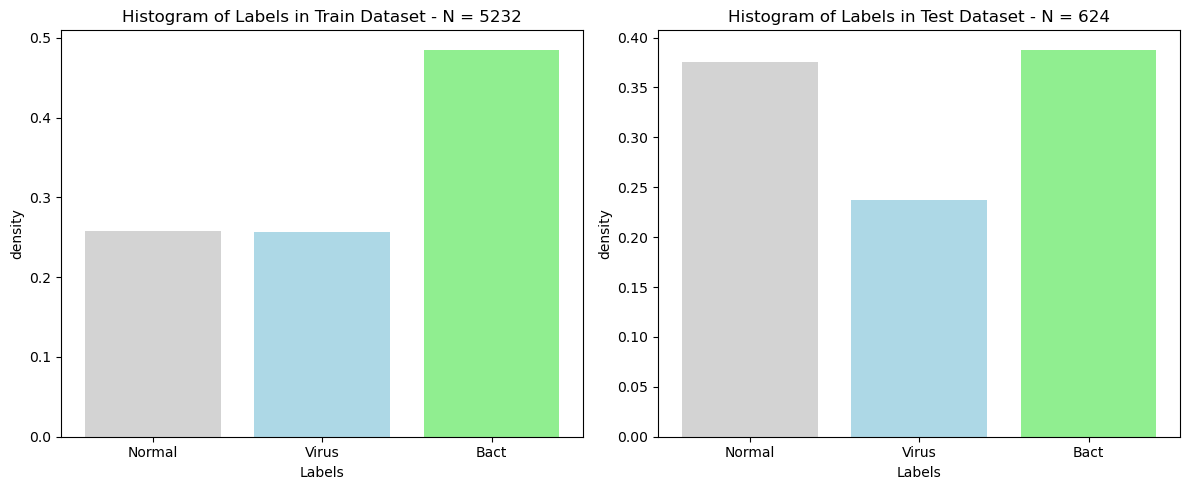

In [266]:
# bar plot of labels in train and dataset
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
train_label_counts = [train_labels.count(0), train_labels.count(1), train_labels.count(2)]
train_label_density = [item/len(train_labels) for item in train_label_counts]
plt.bar(label_names, train_label_density, color = ['lightgray', 'lightblue', 'lightgreen'])
plt.xlabel("Labels")
plt.ylabel("density")
plt.title(f"Histogram of Labels in Train Dataset - N = {len(train_labels)}")
plt.subplot(1,2,2)
test_label_counts = [test_labels.count(0), test_labels.count(1), test_labels.count(2)]
test_label_density = [item/len(test_labels) for item in label_counts]
plt.bar(label_names, test_label_density, color = ['lightgray', 'lightblue', 'lightgreen'])
plt.xlabel("Labels")
plt.ylabel("density")
plt.title(f"Histogram of Labels in Test Dataset - N = {len(test_labels)}")
plt.tight_layout()
plt.show()

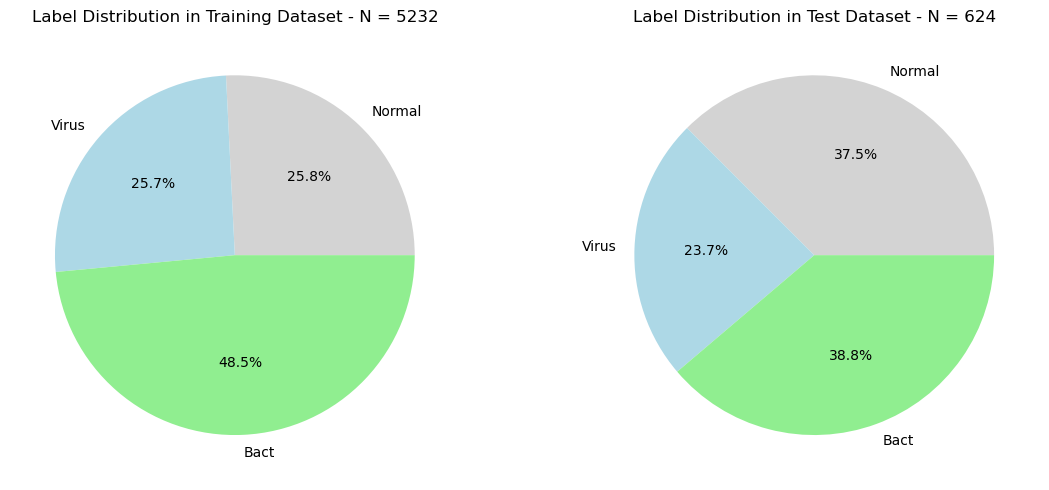

In [267]:

# Create pie plots for training and test datasets
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.pie(train_label_density, labels=label_names, colors=['lightgray', 'lightblue', 'lightgreen'], autopct='%1.1f%%')
plt.title(f"Label Distribution in Training Dataset - N = {len(train_labels)}")

plt.subplot(1, 2, 2)
plt.pie(test_label_density, labels=label_names, colors=['lightgray', 'lightblue', 'lightgreen'], autopct='%1.1f%%')
plt.title(f"Label Distribution in Test Dataset - N = {len(test_labels)}")

plt.tight_layout()
plt.show()


AGREGAR COMENTARIO SOBRE EL DESBALANCE DE LOS DATOS

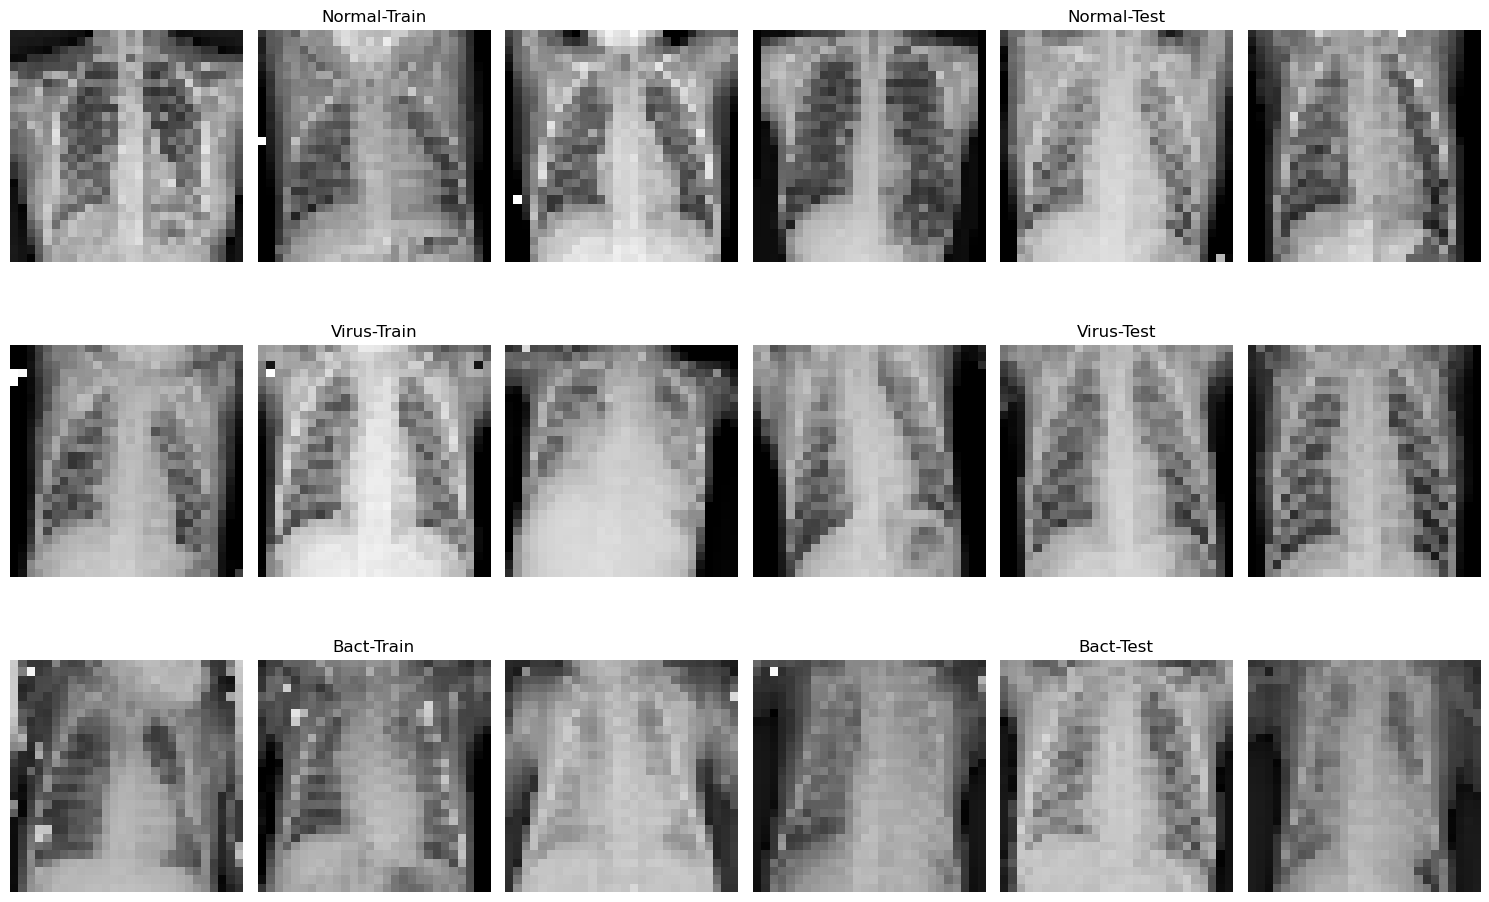

In [268]:
# show three images from each class in training and test dataset
# save 3 images from each class in training and test dataset
normal_train_images = []
virus_train_images = []
bact_train_images = []
normal_test_images = []
virus_test_images = []
bact_test_images = []

for i in range(len(train_images_paths)):
    if train_labels[i] == 0:
        normal_train_images.append(train_images_paths[i])
    elif train_labels[i] == 1:
        virus_train_images.append(train_images_paths[i])
    else:
        bact_train_images.append(train_images_paths[i])

for i in range(len(test_images_paths)):
    if test_labels[i] == 0:
        normal_test_images.append(test_images_paths[i])
    elif test_labels[i] == 1:
        virus_test_images.append(test_images_paths[i])
    else:
        bact_test_images.append(test_images_paths[i])


fig,axes = plt.subplots(3,6)
fig.set_size_inches(15,10)

for j in range(3):
    img = cv2.imread(os.path.join(train_path,'NORMAL',normal_train_images[j]))
    img = cv2.resize(img,(IMG_SIZE,IMG_SIZE))
    axes[0,j].imshow(img)
    axes[0,j].axis('off')

for j in range(3,6):
    img = cv2.imread(os.path.join(test_path,'NORMAL',normal_test_images[j]))
    img = cv2.resize(img,(IMG_SIZE,IMG_SIZE))
    axes[0,j].imshow(img)
    axes[0,j].axis('off')

axes[0,1].set_title('Normal-Train')  
axes[0,4].set_title('Normal-Test')  

for j in range(3):
    img = cv2.imread(os.path.join(train_path,'PNEUMONIA',virus_train_images[j]))
    img = cv2.resize(img,(IMG_SIZE,IMG_SIZE))
    axes[1,j].imshow(img)
    axes[1,j].axis('off')

for j in range(3,6):
    img = cv2.imread(os.path.join(test_path,'PNEUMONIA',virus_test_images[j]))
    img = cv2.resize(img,(IMG_SIZE,IMG_SIZE))
    axes[1,j].imshow(img)
    axes[1,j].axis('off')

axes[1,1].set_title('Virus-Train') 
axes[1,4].set_title('Virus-Test')  


for j in range(3):
    img = cv2.imread(os.path.join(train_path,'PNEUMONIA',bact_train_images[j]))
    img = cv2.resize(img,(IMG_SIZE,IMG_SIZE))
    axes[2,j].imshow(img)
    axes[2,j].axis('off')

for j in range(3,6):
    img = cv2.imread(os.path.join(test_path,'PNEUMONIA',bact_test_images[j]))
    img = cv2.resize(img,(IMG_SIZE,IMG_SIZE))
    axes[2,j].imshow(img)
    axes[2,j].axis('off')

axes[2,1].set_title('Bact-Train')  
axes[2,4].set_title('Bact-Test') 

plt.tight_layout()
plt.show()

In [269]:
# load all images in training and test dataset
train_images = []
test_images = []
mask_train = ["NORMAL"]*train_labels.count(0) + ["PNEUMONIA"]*(len(train_labels) - train_labels.count(0))
mask_test = ["NORMAL"]*test_labels.count(0) + ["PNEUMONIA"]*(len(test_labels) - test_labels.count(0))

train_images_paths = [os.path.join(train_path,mask_train[i],train_images_paths[i]) for i in range(len(train_images_paths))]
test_images_paths = [os.path.join(test_path,mask_test[i],test_images_paths[i]) for i in range(len(test_images_paths))]
# print(train_images_paths[0])

for i in range(len(train_images_paths)):
    img = cv2.imread(train_images_paths[i])
    img = cv2.resize(img,(IMG_SIZE,IMG_SIZE))
    img = cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)
    train_images.append(img)

for i in range(len(test_images_paths)):
    img = cv2.imread(test_images_paths[i])
    img = cv2.resize(img,(IMG_SIZE,IMG_SIZE))
    img = cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)
    test_images.append(img)

In [270]:
train_images_np = np.array(train_images)
test_images_np = np.array(test_images)
train_images_np.shape,test_images_np.shape

((5232, 28, 28), (624, 28, 28))

/Users/javierlopetegui/Documents/School/TESIS/Thesis/thesis/Implementation/Thesis/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:795: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/Users/javierlopetegui/Documents/School/TESIS/Thesis/thesis/Implementation/Thesis/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:805: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


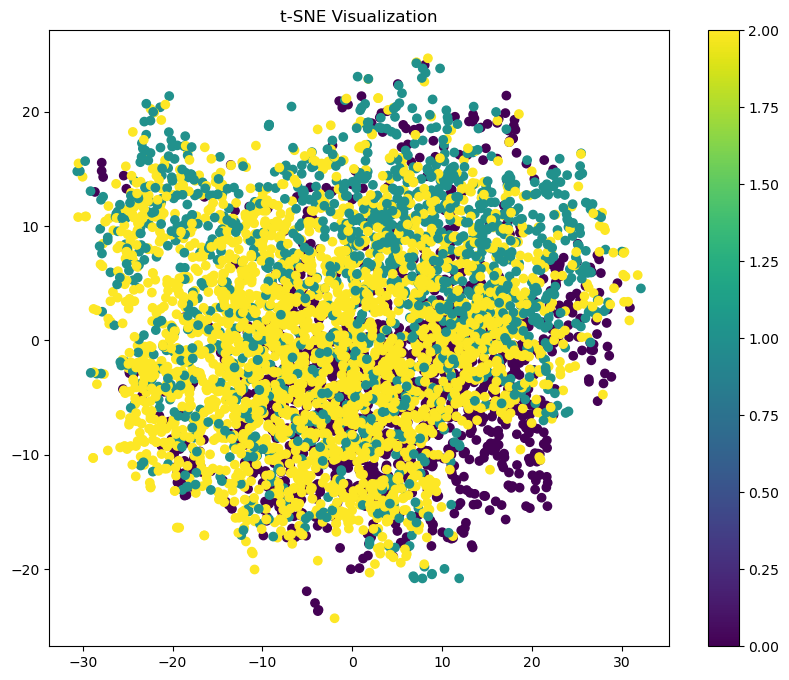

In [271]:
# Create a t-SNE object
tsne = TSNE(n_components=3, random_state=42)

# Fit and transform the data
X_tsne = tsne.fit_transform(train_images_np.reshape(-1, IMG_SIZE*IMG_SIZE))

# Plot the t-SNE visualization
plt.figure(figsize=(10, 8))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=train_labels, cmap='viridis')
plt.colorbar()

plt.title('t-SNE Visualization')
plt.show()



(5232, 2)


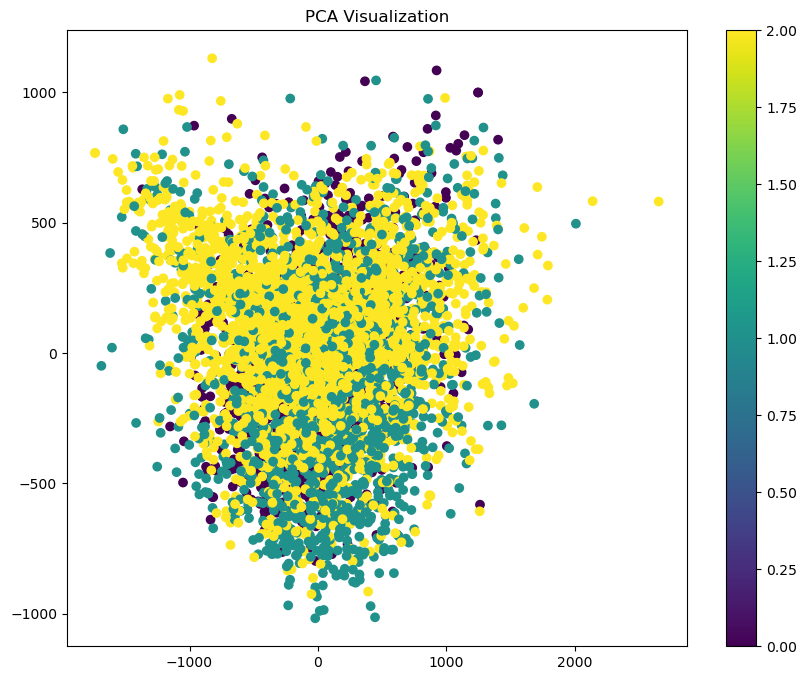

In [272]:
# visualize data using PCA

# Create a PCA instance: pca
pca = PCA(n_components=2)
# Fit the PCA instance to the scaled samples
pca.fit(train_images_np.reshape(-1, IMG_SIZE*IMG_SIZE))
# Transform the scaled samples: pca_features
pca_features = pca.transform(train_images_np.reshape(-1, IMG_SIZE*IMG_SIZE))
# Print the shape of pca_features
print(pca_features.shape)
# Plot the points using the classes as colors
plt.figure(figsize=(10, 8))
plt.scatter(pca_features[:, 0], pca_features[:, 1], c=train_labels, cmap='viridis')
plt.colorbar()
plt.title('PCA Visualization')
plt.show()

### Baseline model

In [288]:
class BaselineModel:
    def __init__(self, labels):
        self.labels = labels
        self.means = np.zeros((len(labels), IMG_SIZE*IMG_SIZE))
        pass

    def fit(self, X, y):
        for i in range(len(self.labels)):
            self.means[i] = np.mean(X[y == i, :], axis=0)
        pass

    def predict(self, X):
        # calculate the distance between each sample and each class mean and assign the 
        # class with the smallest norm2 distance
        y_pred = np.zeros(len(X))
        for i in range(len(X)):
            norms = np.linalg.norm(self.means - X[i], axis=1)
            # print(norms)
            y_pred[i] = np.argmin(norms)
            # print(y_pred[i])
        return y_pred

    def score(self, X, y):
        return np.mean(self.predict(X) == y)

In [289]:
baseline = BaselineModel(labels=[0, 1])
train_labels = np.where(np.array(train_labels) == 0, 0, 1)
test_labels = np.where(np.array(test_labels) == 0, 0, 1)
baseline.fit(train_images_np.reshape(-1, IMG_SIZE*IMG_SIZE), train_labels)
baseline.means[0].shape

(784,)

In [290]:
baseline.score(train_images_np.reshape(-1, IMG_SIZE*IMG_SIZE), train_labels)

0.867545871559633

In [291]:
baseline.score(test_images_np.reshape(-1, IMG_SIZE*IMG_SIZE), test_labels)

0.8173076923076923

In [278]:
np.hstack((baseline.means[0],baseline.means[1]))

array([51.79614529, 72.97627872, 86.42846553, ..., 75.85063096,
       40.60520216, 25.7239248 ])

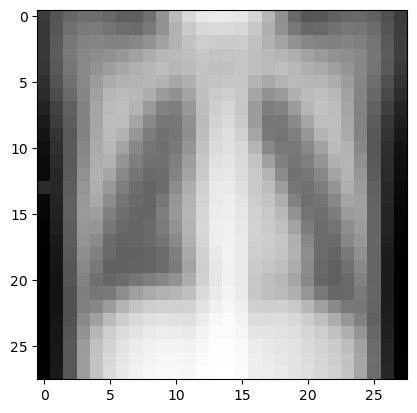

In [279]:
plt.imshow(baseline.means[0].reshape(IMG_SIZE, IMG_SIZE), cmap='gray')

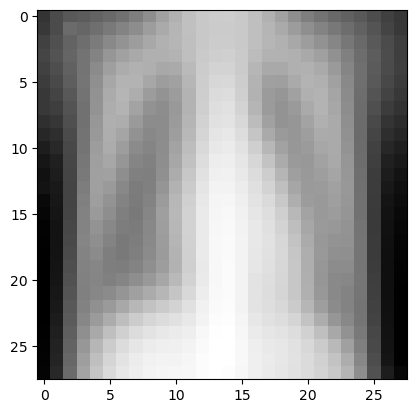

In [280]:
plt.imshow(baseline.means[1].reshape(IMG_SIZE, IMG_SIZE), cmap='gray')

In [293]:

print(classification_report(test_labels, baseline.predict(test_images_np.reshape(-1, IMG_SIZE*IMG_SIZE)), target_names=['Normal', 'Pneumonia']))

              precision    recall  f1-score   support

      Normal       0.75      0.77      0.76       234
   Pneumonia       0.86      0.85      0.85       390

    accuracy                           0.82       624
   macro avg       0.80      0.81      0.81       624
weighted avg       0.82      0.82      0.82       624



In [294]:
from sklearn.metrics import confusion_matrix

confusion_matrix(test_labels, baseline.predict(test_images_np.reshape(-1, IMG_SIZE*IMG_SIZE)))

array([[180,  54],
       [ 60, 330]])